# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from config import api_key

# Import citipy to generate city names from randomly generated coordinates
from citipy import citipy

# CSV export path
output_data_file = "output_data/cities.csv"

# Ranges for latitude and longitude generator
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generating random cities

In [2]:
# List for storing coordinates and city names
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

## Calling OpenWeather API using random cities list


In [3]:
# Constructing base query url for OpenWeather API
base_url = f'http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units=imperial&q='

# List to populate with weather values
weather_list = []

# Looping through citipy generated cities as OpenWeather API parameters
for i in cities:
    response = requests.get(base_url + i).json()
    try:
        weather_list.append([response['name'], response['sys']['country'], response['coord']['lat'], response['coord']['lon'],
                           response['main']['temp_max'], response['main']['humidity'], response['wind']['speed'],
                           response['clouds']['all']])
        print(f"Checking city #{cities.index(i)}: {i.title()}")
    except:
        print("City not found. Next city...")

Checking city #0: Hobart
Checking city #1: Nikolskoye
Checking city #2: Bermeo
Checking city #3: Kruisfontein
Checking city #4: Chokurdakh
City not found. Next city...
Checking city #6: Urengoy
Checking city #7: Aksarka
Checking city #8: Cape Town
Checking city #9: Caravelas
City not found. Next city...
Checking city #11: Port Elizabeth
Checking city #12: Georgetown
Checking city #13: Safaga
Checking city #14: Sangar
Checking city #15: Hilo
Checking city #16: Khatanga
Checking city #17: Vardo
Checking city #18: Tuktoyaktuk
Checking city #19: Punta Arenas
Checking city #20: Palmer
Checking city #21: Port Alfred
Checking city #22: Virginia Beach
Checking city #23: Cidreira
City not found. Next city...
Checking city #25: Yar-Sale
Checking city #26: Rikitea
Checking city #27: Mount Gambier
Checking city #28: Mahebourg
Checking city #29: Tual
Checking city #30: Aswan
Checking city #31: Severo-Kurilsk
Checking city #32: Sao Filipe
Checking city #33: Sitka
Checking city #34: Neustadt
Checking

Checking city #284: Bilma
Checking city #285: Wicklow
Checking city #286: Mormugao
Checking city #287: Maharajganj
Checking city #288: Xiaoweizhai
Checking city #289: Coffs Harbour
Checking city #290: Zaltan
Checking city #291: Santa Cruz
Checking city #292: Lavrentiya
Checking city #293: Solnechnyy
Checking city #294: Gonzalez
Checking city #295: Port Pirie
City not found. Next city...
City not found. Next city...
Checking city #298: Belmonte
Checking city #299: Girvan
Checking city #300: Atbasar
Checking city #301: Ancud
Checking city #302: Ambilobe
Checking city #303: Itarema
Checking city #304: Huainan
Checking city #305: Angoche
Checking city #306: Alofi
City not found. Next city...
Checking city #308: San Patricio
City not found. Next city...
Checking city #310: Zhigansk
Checking city #311: Teguise
Checking city #312: Katsuura
Checking city #313: Takehara
Checking city #314: Nicolas Bravo
Checking city #315: Luanda
Checking city #316: Gouyave
Checking city #317: Lielvarde
Checkin

Checking city #565: Margate
Checking city #566: Hirado
Checking city #567: Mungwi
Checking city #568: Zlutice
Checking city #569: Santa Vitoria Do Palmar
City not found. Next city...
Checking city #571: Amahai
Checking city #572: Karaidel
Checking city #573: Tiarei
Checking city #574: Moerai
Checking city #575: Gomel
Checking city #576: Mirabad
Checking city #577: Maine-Soroa
Checking city #578: Pithoragarh
Checking city #579: Mogocha
Checking city #580: Bagotville
Checking city #581: Vila Franca Do Campo
Checking city #582: Linqiong
Checking city #583: Ixtapa
Checking city #584: Svetlyy
Checking city #585: Port Hedland
Checking city #586: Parsons
Checking city #587: Mayskiy
Checking city #588: Popondetta
Checking city #589: Taltal
Checking city #590: Kenai
Checking city #591: Tomislavgrad
Checking city #592: Najran
Checking city #593: Cap Malheureux
Checking city #594: Half Moon Bay
Checking city #595: Luderitz
Checking city #596: Kassala
Checking city #597: Santa Rosa
Checking city #

## Weather dataframe and output

In [4]:
# Converting weather data list to dataframe
weather_df = pd.DataFrame(weather_list, columns=['City', 'Country', 'Latitude', 'Longitude', 'Max Temp (F)', 
                                                 'Humidity %', 'Wind (mph)', 'Cloudiness %'])

In [5]:
# Output of weather dataframe for VacationPy exercise
weather_df.to_csv(output_data_file)

In [6]:
weather_df.head(10)

,City,Country,Latitude,Longitude,Max Temp (F),Humidity %,Wind (mph),Cloudiness %
0,Hobart,AU,-42.88,147.33,52.00,66,5.82,75
1,Nikolskoye,RU,59.70,30.79,57.20,87,4.47,20
2,Bermeo,ES,43.42,-2.72,80.01,65,12.75,98
3,Kruisfontein,ZA,-34.00,24.73,49.28,85,5.30,0
4,Chokurdakh,RU,70.63,147.92,46.74,77,9.08,89
5,Urengoy,RU,65.97,78.37,56.86,70,8.08,100
6,Aksarka,RU,66.56,67.80,46.81,92,5.88,0
7,Cape Town,ZA,-33.93,18.42,51.80,93,2.24,0
8,Caravelas,BR,-17.71,-39.25,70.68,81,6.40,0
9,Port Elizabeth,ZA,-33.92,25.57,53.60,87,4.70,2


In [7]:
weather_df.describe()

,Latitude,Longitude,Max Temp (F),Humidity %,Wind (mph),Cloudiness %
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000
mean,19.467456,18.527439,69.218596,72.364912,7.326825,50.568421
std,33.048206,91.543296,13.932979,20.155202,4.548959,38.385013
min,-54.800000,-175.200000,35.600000,7.000000,0.340000,0.000000
25%,-8.642500,-59.325000,58.120000,61.000000,3.870000,10.000000
50%,22.245000,26.500000,70.945000,77.000000,6.485000,52.500000
75%,47.685000,100.200000,78.800000,88.000000,10.220000,90.000000
max,78.220000,178.420000,118.000000,100.000000,27.600000,100.000000


## Comparing latitude values across different weather dimensions

In [8]:
# Creating scatterplot builder function
def scatter_builder(x_axis, y_axis):
    # Plot size
    plt.figure(figsize=(12,8))
    # Plot constructor
    weather_scatter = plt.scatter(weather_df[x_axis], weather_df[y_axis], edgecolors='black')
    # Plot formatting
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.title(f'{x_axis} to {y_axis} on (7/30/2020)')
    # Plot display
    plt.show()

### Latitude vs. Temperature

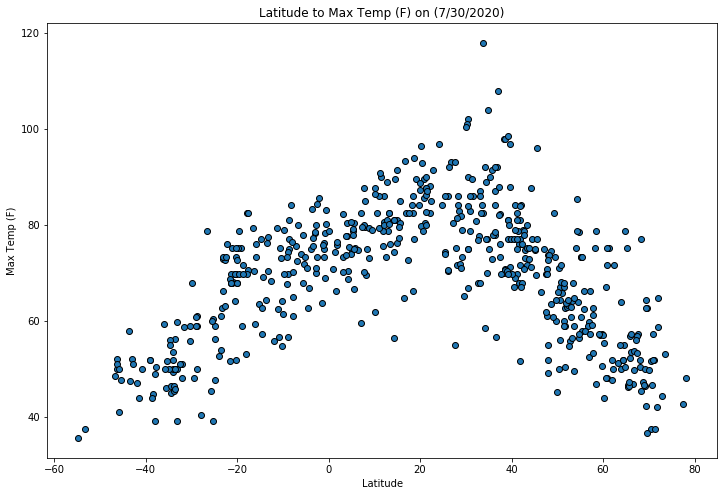

In [9]:
scatter_builder('Latitude', 'Max Temp (F)')

### Latitude vs. Humidity

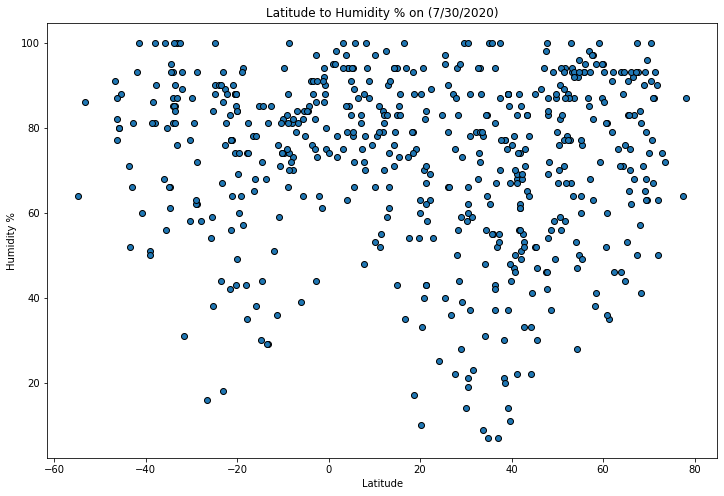

In [10]:
scatter_builder('Latitude', 'Humidity %')

### Latitude vs. Cloudiness

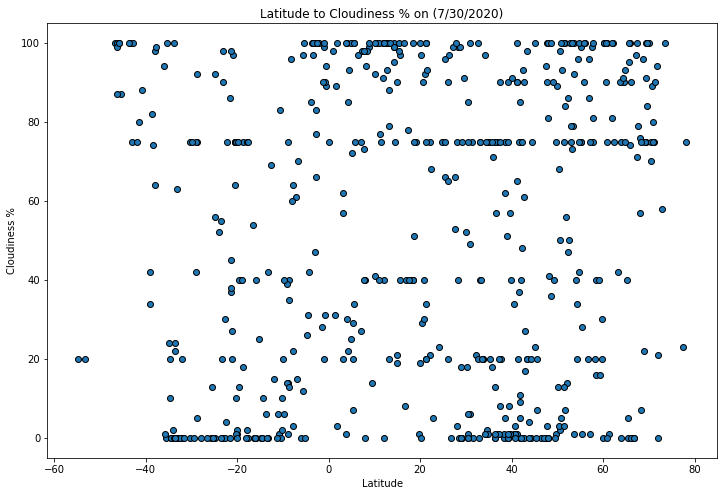

In [11]:
scatter_builder('Latitude', 'Cloudiness %')

### Latitude vs. Wind Speed

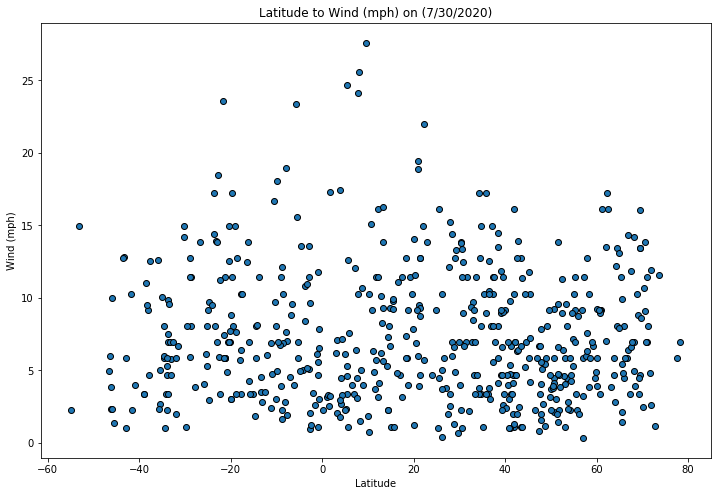

In [12]:
scatter_builder('Latitude', 'Wind (mph)')

## Linear Regression

In [13]:
# Creating linear regression function
def regression_plotter(hemisphere, x_axis, y_axis):
    # Storing column references into variables
    x = hemisphere[x_axis]
    y = hemisphere[y_axis]
    # Building scatterplot
    plt.figure(figsize=(12,8))
    plt.scatter(x, y, edgecolors='black')
    # Extracting and plotting regression variables
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x, regress_values, "r-", alpha=.75)
    # Plot formatting
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.title(f'{x_axis} to {y_axis} on (7/30/2020)')
    plt.annotate(line_eq, (x.min() + 5, y.min() + 10), fontsize=14,color="red")
    print(f'The r-squared value is {rvalue**2}')
    plt.show()

In [14]:
# Creating Northern and Southern Hemisphere DataFrames
northern = weather_df.loc[weather_df['Latitude'] > 0, :]
southern = weather_df.loc[weather_df['Latitude'] < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is 0.4126738059239609


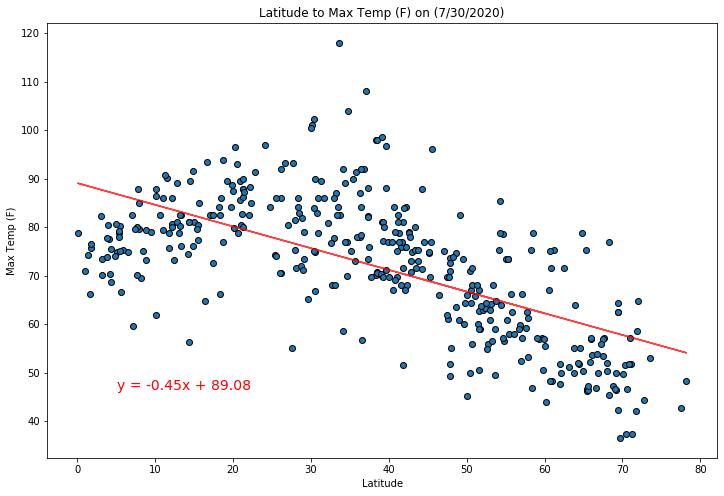

In [15]:
regression_plotter(northern, 'Latitude', 'Max Temp (F)')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is 0.6189733231673191


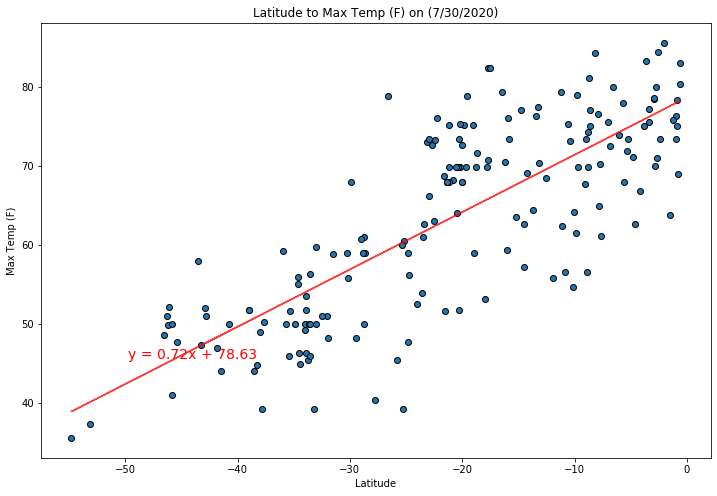

In [16]:
regression_plotter(southern, 'Latitude', 'Max Temp (F)')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is 0.00015939539148343158


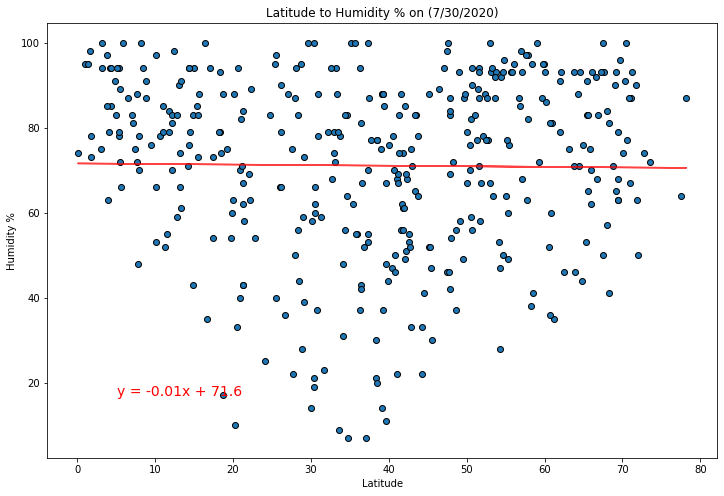

In [17]:
regression_plotter(northern, 'Latitude', 'Humidity %')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is 0.0015081553719378687


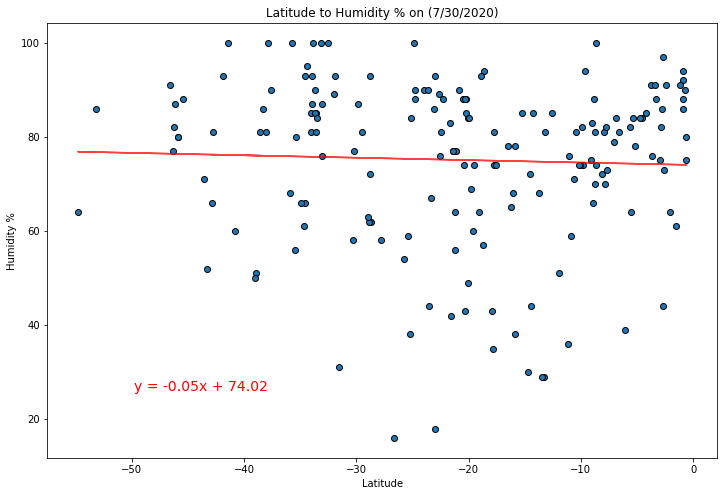

In [18]:
regression_plotter(southern, 'Latitude', 'Humidity %')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is 0.0004431112554976149


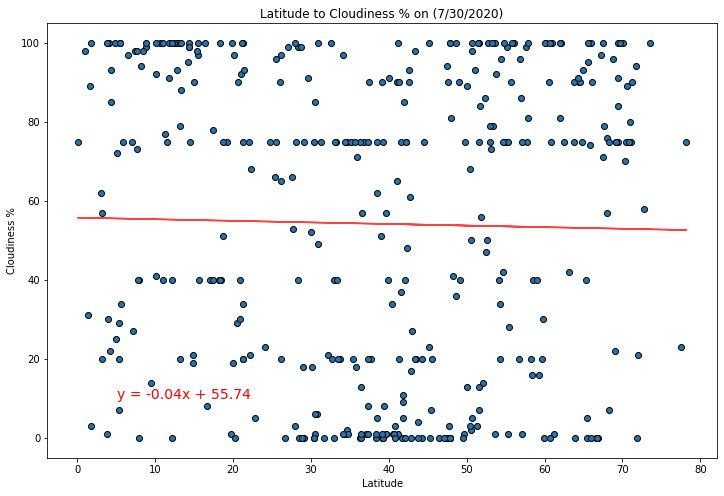

In [19]:
regression_plotter(northern, 'Latitude', 'Cloudiness %')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is 0.00020737292294720826


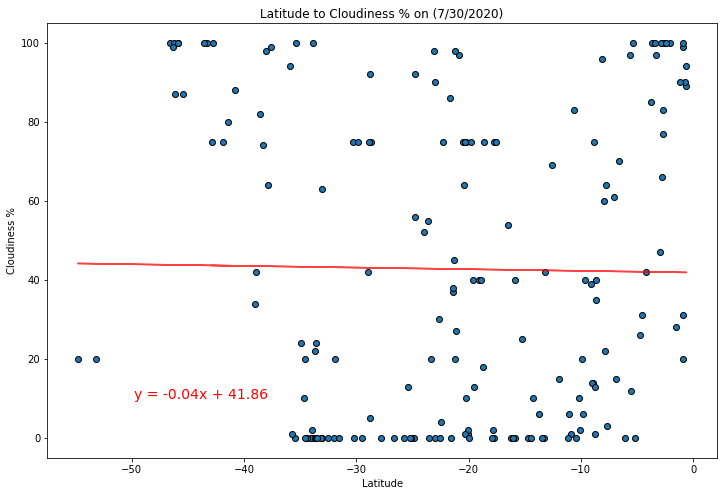

In [20]:
regression_plotter(southern, 'Latitude', 'Cloudiness %')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is 0.003208182659492373


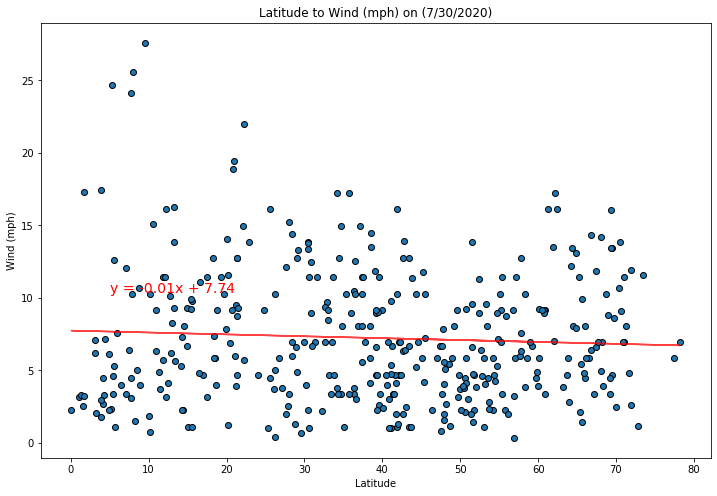

In [21]:
regression_plotter(northern, 'Latitude', 'Wind (mph)')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is 0.0025431517689552103


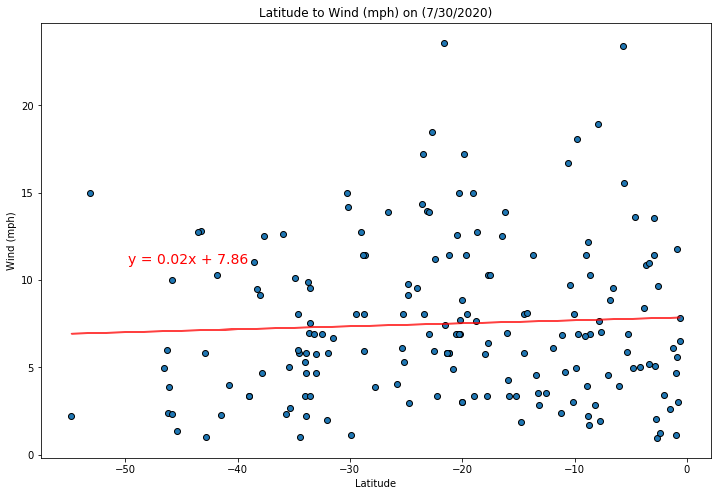

In [22]:
regression_plotter(southern, 'Latitude', 'Wind (mph)')